## Minerando presenças dos deputados

Foi-se utilizado uma base previamente limpa, que pode ser encontrada neste link: [Dados da câmara federal _by_ Nazareno](https://github.com/nazareno/dados-da-camara-federal)

> Obs.: Os dados estão atualizados até o mês de **agosto** de 2017, e a possiblidade de haver uma mineração direto da fonte não foi descartada

In [56]:
import requests as re
import pandas as pd
import numpy as np
import xmltodict
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [57]:
votacoes = pd.read_csv('../data/votacoes.csv')
votacoes.columns

Index([u'tipo', u'num_pro', u'ano', u'id_votacao', u'data', u'hora', u'sessao',
       u'nome', u'id_dep', u'partido', u'uf', u'voto', u'orientacao_partido',
       u'orientacao_gov'],
      dtype='object')

In [58]:
votacoes.shape

(243916, 14)

In [59]:
votacoes.head()

,tipo,num_pro,ano,id_votacao,data,hora,sessao,nome,id_dep,partido,uf,voto,orientacao_partido,orientacao_gov
0,PEC,1,2015,1,22/3/2016,76200,5820,Ariosto Holanda,74103.0,pdt,CE,sim,sim,sim
1,PEC,1,2015,1,22/3/2016,76200,5820,Flavio Nogueira,191923.0,pdt,PI,sim,sim,sim
2,PEC,1,2015,1,22/3/2016,76200,5820,Zé Augusto Nalin,191945.0,pmdb,RJ,sim,NaN,sim
3,PEC,1,2015,1,22/3/2016,76200,5820,Paulo Henrique Lustosa,141517.0,pp,CE,sim,sim,sim
4,PEC,1,2015,1,22/3/2016,76200,5820,Wilson Beserra,193066.0,pmdb,RJ,sim,NaN,sim


In [60]:
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
votacoes['mes'] = [meses[int(x[1])-1] for x in votacoes['data'].str.split('/')]

In [61]:
votacoes_2017 = votacoes[votacoes['ano'] == 2017]
votacoes_2017.head()

,tipo,num_pro,ano,id_votacao,data,hora,sessao,nome,id_dep,partido,uf,voto,orientacao_partido,orientacao_gov,mes
67363,PEC,304,2017,1,10/5/2017,76860,16201,Luiza Erundina,74784.0,psol,SP,não,não,sim,mai
67364,PEC,304,2017,1,10/5/2017,76860,16201,Roberto Alves,152610.0,prb,SP,sim,sim,sim,mai
67365,PEC,304,2017,1,10/5/2017,76860,16201,Lázaro Botelho,141480.0,pp,TO,sim,sim,sim,mai
67366,PEC,304,2017,1,10/5/2017,76860,16201,Sérgio Brito,73808.0,psd,BA,sim,sim,sim,mai
67367,PEC,304,2017,1,10/5/2017,76860,16201,Erivelton Santana,99654.0,pen,BA,não,NaN,sim,mai


- ### Ordenando por presença em sessões no plenário

   #### Deputados com o menor número de presenças

In [62]:
print(votacoes_2017['voto'].unique())

['n\xc3\xa3o' 'sim' '-' 'absten\xc3\xa7\xc3\xa3o' 'art. 17'
 'obstru\xc3\xa7\xc3\xa3o']


In [63]:
presencas = votacoes_2017[(votacoes_2017['voto'] <> '-') & (votacoes_2017['voto'] <> 'obtrução')].groupby([votacoes_2017['nome'], votacoes_2017['partido'], votacoes_2017['id_dep']])['voto'].count()
presencas.sort_values().head(30)

nome                  partido     id_dep  
Pr. Luciano Braga     pmb         193982.0     1
Dagoberto             pdt         141411.0     1
Lourival Gomes        ptn         196358.0     1
Rogério Silva         pmdb        198963.0     1
Edinho Bez            pmdb        73793.0      3
Alexandre Baldy       pode        178875.0     3
Marcos Medrado        solidaried  74634.0      5
                      pode        74634.0      6
Mário Heringer        pdt         74158.0      6
Carlos Zarattini      pt          141398.0     7
Valtenir Pereira      psb         141552.0     7
Odorico Monteiro      psb         178868.0     8
Antônio Jácome        pode        178950.0     8
Renata Abreu          pode        178989.0     9
Jozi  Araújo          pode        178851.0     9
Aluisio Mendes        pode        178881.0     9
Vicente Candido       pt          160622.0     9
Vinicius Gurgel       pr          160591.0     9
Silas Freire          pode        187008.0     9
Ezequiel Teixeira     pode

#### Deputados com maior número de presenças

In [64]:
presencas.sort_values(ascending=False).head(30)

nome                      partido     id_dep  
Tenente Lúcio             psb         178898.0    48
Flavinho                  psb         178978.0    48
Tiririca                  pr          160976.0    48
Ivan Valente              psol        73531.0     48
Carlos Manato             solidaried  74163.0     48
Luiz Couto                pt          74041.0     47
João Daniel               pt          178970.0    47
Miro Teixeira             rede        74862.0     47
Glauber Braga             psol        152605.0    47
Victor Mendes             psd         178888.0    47
Rogério Peninha Mendonça  pmdb        160651.0    47
Ronaldo Benedet           pmdb        160515.0    47
Afonso Motta              pdt         178835.0    47
Delegado Edson Moreira    pr          178893.0    47
Walney Rocha              pen         160631.0    47
Valmir Assunção           pt          160610.0    46
Izaque Silva              psdb        196378.0    46
Jarbas Vasconcelos        pmdb        131943.0    46

#### Deputados ausentes que não justificaram

 * #### Mais ausentes

In [65]:
ausencias = votacoes_2017[(votacoes_2017['voto'] == '-')].groupby([votacoes_2017['nome'], votacoes_2017['partido'], votacoes_2017['id_dep']])['voto'].count()

In [66]:
ausencias.sort_values(ascending=False).head(30)

nome                 partido     id_dep  
José Otávio Germano  pp          74395.0     45
Giovani Cherini      pr          160673.0    45
Carlos Zarattini     pt          141398.0    38
Vinicius Gurgel      pr          160591.0    36
Vicente Candido      pt          160622.0    36
Aníbal Gomes         pmdb        74212.0     34
Guilherme Mussi      pp          160667.0    33
Luizianne Lins       pt          178866.0    33
Giacobo              pr          74383.0     32
Jéssica Sales        pmdb        178839.0    32
Marco Maia           pt          133373.0    31
Roberto Góes         pdt         178995.0    31
João Carlos Bacelar  pr          141458.0    31
Hermes Parcianello   pmdb        73772.0     31
Ariosto Holanda      pdt         74103.0     31
Sérgio Reis          prb         178991.0    30
César Halum          prb         160576.0    30
Bruna Furlan         psdb        160589.0    30
Diego Garcia         phs         178929.0    29
Wladimir Costa       solidaried  73930.0     2

 * #### Menos ausentes

In [67]:
ausencias.sort_values().head(40)

nome                      partido     id_dep  
Mário Heringer            pdt         74158.0     1
Laudivio Carvalho         solidaried  178894.0    1
Miro Teixeira             rede        74862.0     1
Jarbas Vasconcelos        pmdb        131943.0    1
Rogério Peninha Mendonça  pmdb        160651.0    1
Luciano Bivar             psl         74478.0     1
Luiz Carlos Ramos         pode        178802.0    1
Glauber Braga             psol        152605.0    1
Pedro Chaves              pmdb        74812.0     1
Francisco Chapadinha      ptn         178907.0    1
Josias Gomes              pt          74141.0     1
Francisco Chapadinha      pode        178907.0    1
Chico D Angelo            pt          141439.0    1
Valtenir Pereira          psb         141552.0    1
Victor Mendes             psd         178888.0    1
Walney Rocha              pen         160631.0    1
Fernando Torres           psd         160676.0    1
Luiz Couto                pt          74041.0     1
Marcos Medrado   

- ### Visualização de dados

Algo que me supreendeu aqui: Cerca de pouco mais de 200 deputados foram à mais de 30 sessões. _No mínimo interessante!_

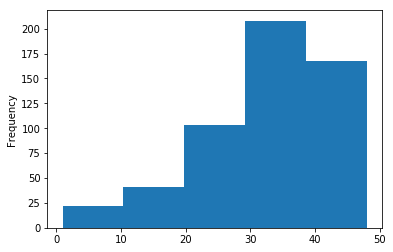

In [68]:
presencas.plot.hist(bins=5)

E em sua grande maioria, possuem menos de 10 faltas não justificadas.

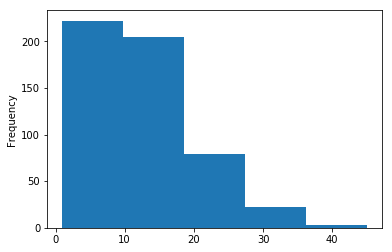

In [69]:
ausencias.plot.hist(bins=5)

In [70]:
presencas_df = presencas.to_frame('qtd')
ausencias_df = ausencias.to_frame('qtd')

In [71]:
presencas_df.head()

,,,qtd
nome,partido,id_dep,
Abel Mesquita Jr.,dem,178957.0,35
Adail Carneiro,pp,178864.0,28
Adalberto Cavalcanti,ptb,178914.0,37
Adelmo Carneiro Leão,pt,178890.0,42
Adelson Barreto,pr,178968.0,39


In [72]:
ausencias_df.head()

,,,qtd
nome,partido,id_dep,
Abel Mesquita Jr.,dem,178957.0,11
Adail Carneiro,pp,178864.0,20
Adalberto Cavalcanti,ptb,178914.0,10
Adelmo Carneiro Leão,pt,178890.0,6
Adelson Barreto,pr,178968.0,9


In [73]:
ausencias_df.to_csv('../data/qtdausencia_bydeputado.csv', sep=',')
presencas_df.to_csv('../data/qtdpresenca_bydeputado.csv', sep=',')